## Capstone Project - Rome Caput Mundi...
### Rome! That's a wonderful city with a lots of... air pollution

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
    * [Analysis 1](#analysis1)
    * [Analysis 2](#analysis2)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction <a name="introduction"></a>

Rome! That's a wonderful city with a lots of... air pollution

This project aims to select the neighborhood with the less concentration of air pollution in Rome where to do an **["aperitivo"](https://en.wikipedia.org/wiki/Ap%C3%A9ritif_and_digestif)** and share a nice talk with your friends. To do this will be taken into account the real air pollution data of Rome thank to different main control units located on the ground. 

Unfortunately or fortunately air **pollution varies day-by-day and zone-by-zone** depending of the period of the year, of the number of automobiles, houses heating, farm animals (it sound strange but is's true...), and so on. For these reasons, the major is sometimes obligated to take some "extreme measures" such us the circulation ban of all diesel cars (up to Euro 6D-Temp) and so on. At the same time, people don't know where is the cleanest air in the city, so they prefer to remain home because the don't know where to go.

There are a lot of data and a lot of possibilities so, we decided that only the first three control units will be choosen, those with less **PM10** values. The geographical coordinates of those control units will be crossed with the geographical coordinates of the neighborhoods in order to get all bar and choose the best three.

At that point it will be possible to choose where to have fun.

## Data <a name="data"></a>

Following data sources will be needed to extract/generate the required informations:
- [**Part 1.a**](#part1a) - **[PM10 values](http://www.arpalazio.net/main/aria/sci/qa/misure/PM10.php)**: Real-time experimental measures of the PM10 particles scraped from the official ARPALAZIO website
- [**Part 1.b**](#part1b) - **[Latitude and Longitude values 1](http://www.arpalazio.net/main/aria/sci/basedati/bollettini/2018/BA092018.pdf)**: Geographical coordinates (lat and lon) of the control units extracted from an official pdf document on the ARPALAZIO website
- [**Part 1.c**](#part1c) - **[Neighborhoods](https://it.wikipedia.org/wiki/Quartieri_di_Roma)**: Getting the main neighborhoods of Rome scraping a wikipedia page
- [**Part 1.d**](#part1d) - **Latitude and Longitude values 2**: Geographical coordinates of neighborhoods obtained through geocoder
    
    * [Analysis 1](#analysis1)

- [**Part 2**](#part2) - **Bar**: Names and statistical data of bar and activities obtained from Foursquare services
    
    * [Analysis 2](#analysis2)

### Import necessary libraries

In [2]:
import urllib.request as urllib2

import html5lib # library to parse html code
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from bs4 import BeautifulSoup # library for web scrapping  

import geocoder

from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
from IPython.display import Image
from IPython.core.display import HTML    
from pandas.io.json import json_normalize
from tabula import read_pdf
from haversine import haversine, Unit
from sklearn.cluster import KMeans

import folium # plotting library

# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Folium installed')
print('Libraries imported.')
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

import locale
locale.setlocale( locale.LC_ALL, '' )

pd.options.mode.chained_assignment = None  # default='warn'

Folium installed
Libraries imported.
Matplotlib version:  3.1.2


### Part 1.a<a name="part1a"></a>

Real-time experimental measures of the PM10 particles scraped from the official ARPALAZIO website

In [3]:
# getting data from internet
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.4100.0 Safari/537.36'}

url='http://www.arpalazio.net/main/aria/sci/qa/misure/PM10.php'

try:
    page = requests.get(url, headers=headers)

    # using beautiful soup to parse the HTML/XML codes.
    soup = BeautifulSoup(page.content, 'html5lib')
    
    #print(soup.prettify())
    
    data = []
    table = soup.find_all('table')

    table_body = table[0].find('tbody')

    rows = table_body.find_all('tr')
    for row in rows:
        cols = row.find_all('td')
        cols = [ele.text.strip() for ele in cols]
        data.append([ele for ele in cols if ele]) # Get rid of empty values

    print('Number of rows: {}'.format(len(data)))
        
except urllib2.URLError:
    print(' [ KO. Error!!! ]')

Number of rows: 91


In [4]:
# shifting data
for row in range(3,len(data)):
    if (len(data[row])<5):
        data[row].insert(0,data[row-1][0])
    
column_names=[data[0][0],data[0][1],data[0][2]+' - '+data[1][0],data[0][3]+' - '+data[1][1],data[0][3]+' - '+data[1][2]]

# creating PM10 dataframe
pm10_df = pd.DataFrame(data[3:-2:2],columns=column_names).round(2)

# replacing values 
pm10_df=pm10_df.replace({'ND':float('nan'),'-':float('nan')})

# converting to float
pm10_df[column_names[2:]]=pm10_df[column_names[2:]].astype(float)

pm10_df

,Provincia,Stazione,Media Giornaliera02.02.2020 - (µg/m3),Standard di leggeDal 01.01 al 01.02.2020 - Media di Periodo(µg/m3),Standard di leggeDal 01.01 al 01.02.2020 - Sup. Giorni(50 µg/m3)
0,Frosinone,Alatri,29.0,52.0,21.0
1,Frosinone,Anagni,13.0,28.0,1.0
2,Frosinone,Cassino,76.0,99.0,27.0
3,Frosinone,Ceccano,NaN,110.0,29.0
4,Frosinone,Ferentino,30.0,58.0,22.0
5,Frosinone,Fontechiari,24.0,25.0,0.0
6,Frosinone,Frosinone scalo,53.0,102.0,30.0
7,Frosinone,Via Mazzini,35.0,53.0,16.0
8,Latina,Aprilia 2,24.0,36.0,1.0
9,Latina,Latina Scalo,25.0,41.0,3.0


#### Getting PM10 data for Rome

In [5]:
# group data
pm10_by_province = pm10_df.groupby('Provincia',as_index=False)
pm10_RM=pm10_by_province.get_group('Roma')

# resetting index
pm10_RM=pm10_RM.reset_index()
pm10_RM.rename(columns={'index': 'old_idx'}, inplace=True)

pm10_RM.head()

,old_idx,Provincia,Stazione,Media Giornaliera02.02.2020 - (µg/m3),Standard di leggeDal 01.01 al 01.02.2020 - Media di Periodo(µg/m3),Standard di leggeDal 01.01 al 01.02.2020 - Sup. Giorni(50 µg/m3)
0,15,Roma,Arenula,27.0,45.0,15.0
1,16,Roma,Preneste,37.0,53.0,17.0
2,17,Roma,Francia,39.0,43.0,12.0
3,18,Roma,Magna Grecia,37.0,52.0,18.0
4,19,Roma,Cinecitta',29.0,53.0,17.0


### Part 1.b<a name="part1b"></a>

Geographical coordinates (lat and lon) of the control units extracted from an official pdf document on the ARPALAZIO website

In [6]:
#df=read_pdf('http://www.arpalazio.net/main/aria/sci/basedati/bollettini/2018/BA092018.pdf', pages=14)
tmp=read_pdf('BA092018.pdf', pages=14)
tmp=tmp[0]

Got stderr: feb 03, 2020 4:25:23 PM org.apache.pdfbox.pdmodel.font.PDSimpleFont toUnicode
AVVERTENZA: No Unicode mapping for a50 (50) in font F15
feb 03, 2020 4:25:23 PM org.apache.pdfbox.pdmodel.font.PDSimpleFont toUnicode
AVVERTENZA: No Unicode mapping for a54 (54) in font F15
feb 03, 2020 4:25:23 PM org.apache.pdfbox.pdmodel.font.PDSimpleFont toUnicode
AVVERTENZA: No Unicode mapping for a46 (46) in font F15
feb 03, 2020 4:25:23 PM org.apache.pdfbox.pdmodel.font.PDSimpleFont toUnicode
AVVERTENZA: No Unicode mapping for a48 (48) in font F15
feb 03, 2020 4:25:23 PM org.apache.pdfbox.pdmodel.font.PDSimpleFont toUnicode
AVVERTENZA: No Unicode mapping for a49 (49) in font F15
feb 03, 2020 4:25:23 PM org.apache.pdfbox.pdmodel.font.PDSimpleFont toUnicode
AVVERTENZA: No Unicode mapping for a56 (56) in font F15
feb 03, 2020 4:25:23 PM org.apache.pdfbox.pdmodel.font.PDSimpleFont toUnicode
AVVERTENZA: No Unicode mapping for a45 (45) in font F15
feb 03, 2020 4:25:23 PM org.apache.pdfbox.pdmodel.

In [7]:
RM_geo_control_units=tmp.replace(np.nan, 'Roma', regex=True)

# removing meters symbol 
RM_geo_control_units['Quotaslm']=RM_geo_control_units['Quotaslm'].map(lambda x: x.rstrip('m'))

# converting to float
RM_geo_control_units['Quotaslm']=RM_geo_control_units['Quotaslm'].astype(float)

RM_geo_control_units.head()

,Rete,Stazione,Latitudine,Longitudine,Quotaslm
0,Roma,Arenula,41.894020,12.475368,31.0
1,Roma,Preneste,41.886018,12.541614,37.0
2,Roma,Francia,41.947447,12.469588,43.0
3,Roma,Magna Grecia,41.883064,12.508939,49.0
4,Roma,Cinecitta',41.857720,12.568665,53.0


#### Merging dataframes

In [8]:
RM_df=RM_geo_control_units
RM_df[column_names[2:]]=pm10_RM.iloc[:, 3:]

#checking data type and converting
RM_df.dtypes

Rete                                                                    object
Stazione                                                                object
Latitudine                                                             float64
Longitudine                                                            float64
Quotaslm                                                               float64
Media Giornaliera02.02.2020 - (µg/m3)                                  float64
Standard di leggeDal 01.01 al  01.02.2020 - Media di Periodo(µg/m3)    float64
Standard di leggeDal 01.01 al  01.02.2020 - Sup. Giorni(50 µg/m3)      float64
dtype: object

In [9]:
RM_df.head()
RM_df

,Rete,Stazione,Latitudine,Longitudine,Quotaslm,Media Giornaliera02.02.2020 - (µg/m3),Standard di leggeDal 01.01 al 01.02.2020 - Media di Periodo(µg/m3),Standard di leggeDal 01.01 al 01.02.2020 - Sup. Giorni(50 µg/m3)
0,Roma,Arenula,41.894020,12.475368,31.0,27.0,45.0,15.0
1,Roma,Preneste,41.886018,12.541614,37.0,37.0,53.0,17.0
2,Roma,Francia,41.947447,12.469588,43.0,39.0,43.0,12.0
3,Roma,Magna Grecia,41.883064,12.508939,49.0,37.0,52.0,18.0
4,Roma,Cinecitta',41.857720,12.568665,53.0,29.0,53.0,17.0
5,Roma,Colleferro oberdan,41.730840,13.004350,219.0,29.0,45.0,14.0
6,Roma,Colleferro europa,41.725010,13.009575,223.0,40.0,70.0,22.0
7,Roma,Allumiere,42.157741,11.908744,542.0,8.0,13.0,0.0
8,Roma,Civitavecchia,42.091629,11.802466,26.0,14.0,24.0,0.0
9,Roma,Guidonia,41.995679,12.726371,89.0,20.0,41.0,6.0


### Part 1.c<a name="part1c"></a>

Getting the main neighborhoods of Rome scraping a wikipedia page

In [10]:
url='https://it.wikipedia.org/wiki/Quartieri_di_Roma'

try:
    page = requests.get(url, headers=headers)

    # using beautiful soup to parse the HTML/XML codes.
    soup = BeautifulSoup(page.content, 'html5lib')
    
    #print(soup.prettify())
    
    data = []
    info = soup.find_all('div', {'class','colonne_strette'})
    info = info[0].find_all('li')
    for row in info:
        idx=row.find('b').get_text().strip()
        name=row.find('a').get('title').replace('(Roma)','').strip()
        data.append([idx, name])

    print('Number of neighborhoods: {}'.format(len(data)))
 
except urllib2.URLError:
    print(' [ KO. Error!!! ]')

Number of neighborhoods: 35


### Part 1.d<a name="part1d"></a>

 Using geocoder to get geographical coordinates of the main neighborhoods

In [11]:
column_names_ne=['Sigla','Quartiere','Latitudine','Longitudine']

# creating PM10 dataframe
RM_neighborhoods = pd.DataFrame(data,columns=column_names_ne[0:2])
RM_neighborhoods[column_names_ne[2]]=np.nan
RM_neighborhoods[column_names_ne[3]]=np.nan

# initialize variable to None
lat_lng_coords = None

for k in range(0, len(RM_neighborhoods)-1):
    print('{}/{}'.format(k,len(RM_neighborhoods)-1))
    
    g = geocoder.arcgis('{}, Rome, Italy'.format(data[k]))
    lat_lng_coords = g.latlng
    
    RM_neighborhoods['Latitudine'][k] = lat_lng_coords[0]
    RM_neighborhoods['Longitudine'][k] = lat_lng_coords[1]

0/34
1/34
2/34
3/34
4/34
5/34
6/34
7/34
8/34
9/34
10/34
11/34
12/34
13/34
14/34
15/34
16/34
17/34
18/34
19/34
20/34
21/34
22/34
23/34
24/34
25/34
26/34
27/34
28/34
29/34
30/34
31/34
32/34
33/34


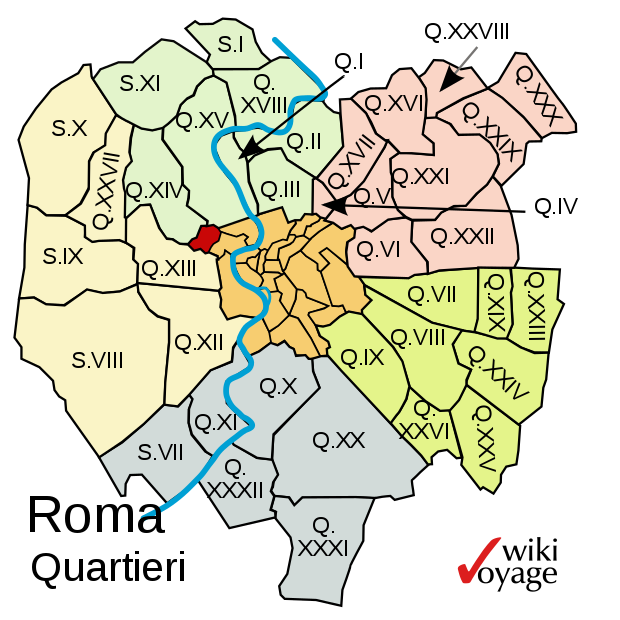

In [12]:
# neighborhoods map
url='https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/Mappa_dei_quartieri_di_Roma.svg/620px-Mappa_dei_quartieri_di_Roma.svg.png'
Image(requests.get(url).content)

In [13]:
RM_neighborhoods

,Sigla,Quartiere,Latitudine,Longitudine
0,Q. I,Flaminio,41.929990,12.464510
1,Q. II,Parioli,41.931770,12.486220
2,Q. III,Pinciano,41.918860,12.484100
3,Q. IV,Salario,41.913310,12.502170
4,Q. V,Nomentano,41.914470,12.522100
5,Q. VI,Tiburtino,41.897850,12.521010
6,Q. VII,Prenestino-Labicano,41.885700,12.535210
7,Q. VIII,Tuscolano,41.871640,12.540550
8,Q. IX,Appio-Latino,41.874610,12.513330
9,Q. X,Ostiense,41.860010,12.480470


In [14]:
# remove rows with NaN
RM_neighborhoods=RM_neighborhoods.dropna()

## Analysis 1<a name="analysis1"></a>

#### Showing control units on a map

In [15]:
# make an empty map
RM_geo=[41.893056, 12.482778]

RM_map = folium.Map(location=RM_geo, zoom_start=9)

# I can add marker one by one on the map
for i in range(0,len(RM_df)):
    folium.Marker([RM_df.iloc[i]['Latitudine'], RM_df.iloc[i]['Longitudine']],
                  popup=RM_df.iloc[i]['Stazione'], 
                  icon=folium.Icon(color='red', icon='info-sign')).add_to(RM_map)

RM_map

#### Filtering control units

In [16]:
RM_filtered_df=RM_df.iloc[:18,:]
RM_filtered_df = RM_filtered_df.drop([5,6,7,8,9,11,12,13], axis=0)
RM_filtered_df

RM_filtered_map = folium.Map(location=RM_geo, 
                             zoom_start=11)

# I can add marker one by one on the map
for i in range(0,len(RM_filtered_df)):
    folium.Marker([RM_filtered_df.iloc[i]['Latitudine'], RM_filtered_df.iloc[i]['Longitudine']],
                  popup=RM_filtered_df.iloc[i]['Stazione'], 
                  icon=folium.Icon(color='red', icon='info-sign')).add_to(RM_filtered_map)

RM_filtered_map

#### Showing PM10 values on a barchart

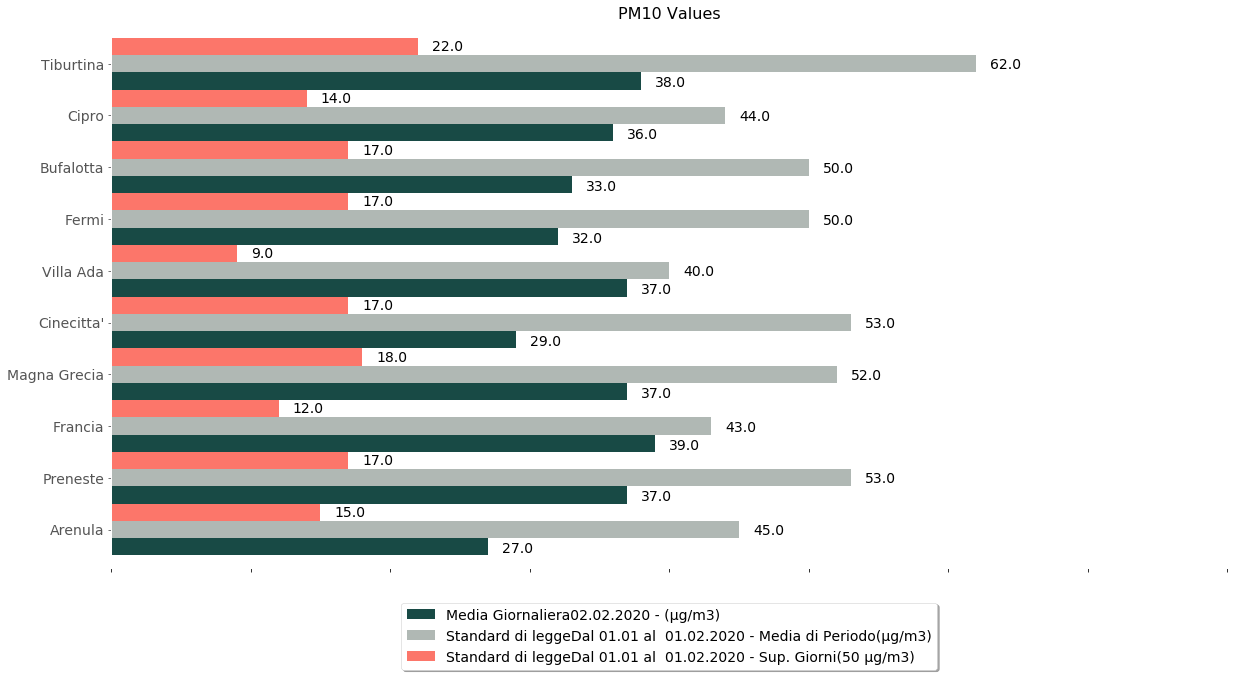

In [17]:
cols=[1,5,6,7]

# List columns
columns=RM_filtered_df.columns.values[cols]
RM_filtered_df[columns]
ax=RM_filtered_df[columns].plot(kind="barh", figsize=(20, 10), width=1, color=['#184A45FF', '#B0B8B4FF', '#FC766AFF'])

ax.set_xlim(0,80)
# ax.set_ylim(-1,18)
ax.set_title('PM10 Values', fontdict = {'fontsize' : 16}) # Change the font size of the title
ax.legend(fontsize=14, facecolor='white', loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=1) # Change the font size of the legend
ax.tick_params(axis="x", labelsize=14) # Change the font size of the x axix label
ax.tick_params(axis="y", labelsize=14) # Change the font size of the x axix label

# Remove the left, top, and right borders; make sure the color of x axix labels is black
ax.set_facecolor('white') # Change background to white
ax.set_xticklabels([]) # Turn off y ticks
ax.set_yticklabels(RM_filtered_df['Stazione']) # Turn off y ticks
# ax.axhline(0, color='black') # Draw an x axix line 
ax.tick_params(axis='x', colors='black') # Make sure the color of x axix labels is black

# Add percentage numbers over the bars
for i in range(0,len(RM_filtered_df)):
    k=-0.35
    for index in range(cols[1],cols[3]+1):
        value=RM_filtered_df.iloc[i,index]
        #print(i, k, index, value)
        label=format(value)
        ax.annotate(label, xy=(value+1, i+k-0.1), color='black', fontsize=14)
        k=k+0.35

# showing plot
plt.show()


#### Finding best three control units

In [18]:
tmp=RM_filtered_df.sort_values(by=[columns[1]])
RM_best_cunit=tmp[0:3]

# reset index
RM_best_cunit=RM_best_cunit.reset_index()

RM_best_cunit

,index,Rete,Stazione,Latitudine,Longitudine,Quotaslm,Media Giornaliera02.02.2020 - (µg/m3),Standard di leggeDal 01.01 al 01.02.2020 - Media di Periodo(µg/m3),Standard di leggeDal 01.01 al 01.02.2020 - Sup. Giorni(50 µg/m3)
0,0,Roma,Arenula,41.894020,12.475368,31.0,27.0,45.0,15.0
1,4,Roma,Cinecitta',41.857720,12.568665,53.0,29.0,53.0,17.0
2,14,Roma,Fermi,41.864194,12.469531,26.0,32.0,50.0,17.0


#### Showing Control units and neighboroods

In [19]:
RM_neighborhoods=RM_neighborhoods.iloc[:32,:]
RM_neighborhoods

RM_fnb_map = folium.Map(location=RM_geo, zoom_start=11)

# I can add marker one by one on the map
for i in range(0,len(RM_best_cunit)):
    folium.Marker([RM_best_cunit.iloc[i]['Latitudine'], RM_best_cunit.iloc[i]['Longitudine']], 
                  popup=RM_best_cunit.iloc[i]['Stazione'], 
                  icon=folium.Icon(color='green', icon='info-sign')).add_to(RM_fnb_map)

for i in range(0,len(RM_neighborhoods)):
    folium.Marker([RM_neighborhoods.iloc[i]['Latitudine'], RM_neighborhoods.iloc[i]['Longitudine']], 
                  popup=RM_neighborhoods.iloc[0]['Sigla']+'\n'+RM_neighborhoods.iloc[0]['Quartiere']).add_to(RM_fnb_map)

RM_fnb_map

#### Calculating the distances between control units and neiborhoods

In [21]:
lbl=[]
for cu in range(0,len(RM_best_cunit)):
    lbl.append('Distance:{} ({})'.format(cu,RM_best_cunit['Stazione'][cu]))
    tmp=[]
    
    for ne in range(0,len(RM_neighborhoods)):
        tmp.append(haversine(
            (RM_neighborhoods['Latitudine'][ne], RM_neighborhoods['Longitudine'][ne]),
            (RM_best_cunit['Latitudine'][cu], RM_best_cunit['Longitudine'][cu]),
            unit=Unit.METERS))
    
    RM_neighborhoods[lbl[cu]]=tmp
    
RM_neighborhoods=RM_neighborhoods
RM_neighborhoods

,Sigla,Quartiere,Latitudine,Longitudine,Distance:0 (Arenula),Distance:1 (Cinecitta'),Distance:2 (Fermi)
0,Q. I,Flaminio,41.929990,12.464510,4099.361283,11785.650891,7327.984804
1,Q. II,Parioli,41.931770,12.486220,4292.588701,10694.200713,7640.022079
2,Q. III,Pinciano,41.918860,12.484100,2855.047850,9758.174626,6197.060894
3,Q. IV,Salario,41.913310,12.502170,3085.583379,8277.064254,6093.213908
4,Q. V,Nomentano,41.914470,12.522100,4486.429075,7394.533312,7084.414132
5,Q. VI,Tiburtino,41.897850,12.521010,3801.674406,5956.388178,5671.762671
6,Q. VII,Prenestino-Labicano,41.885700,12.535210,5039.187799,4165.716573,5940.553343
7,Q. VIII,Tuscolano,41.871640,12.540550,5942.338888,2795.758364,5938.751706
8,Q. IX,Appio-Latino,41.874610,12.513330,3812.413183,4952.109546,3807.157903
9,Q. X,Ostiense,41.860010,12.480470,3805.262849,7308.488870,1018.373886


#### Selecting the best three

In [22]:
tmp1=RM_neighborhoods.sort_values(by=[lbl[0]])
tmp2=RM_neighborhoods.sort_values(by=[lbl[1]])
tmp3=RM_neighborhoods.sort_values(by=[lbl[2]])
best_neighborhoods=tmp1[0:1]
best_neighborhoods=best_neighborhoods.append(tmp2[0:1], ignore_index = True) 
best_neighborhoods=best_neighborhoods.append(tmp3[0:1], ignore_index = True) 

# RM_best_neighborhoods
best_neighborhoods

,Sigla,Quartiere,Latitudine,Longitudine,Distance:0 (Arenula),Distance:1 (Cinecitta'),Distance:2 (Fermi)
0,Q. XII,Gianicolense,41.87422,12.45766,2645.054661,9373.401735,1486.299986
1,Q. XXV,Appio Claudio,41.84835,12.56391,8918.407319,1113.846562,8012.594207
2,Q. X,Ostiense,41.86001,12.48047,3805.262849,7308.488870,1018.373886


#### Showing best neighborhoods

In [23]:
RM_fnb_best_map = folium.Map(location=RM_geo, zoom_start=11)

# RM_best_cunit (GREEN)
for i in range(0,len(RM_best_cunit)):
    folium.Marker([RM_best_cunit.iloc[i]['Latitudine'], RM_best_cunit.iloc[i]['Longitudine']], 
                  popup=RM_best_cunit.iloc[i]['Stazione'], 
                  icon=folium.Icon(color='green', icon='info-sign')).add_to(RM_fnb_best_map)

# RM_neighborhoods (BLUE)
for i in range(0,len(RM_neighborhoods)):
    folium.Marker([RM_neighborhoods.iloc[i]['Latitudine'], RM_neighborhoods.iloc[i]['Longitudine']], 
                  popup=RM_neighborhoods.iloc[0]['Sigla']+'\n'+RM_neighborhoods.iloc[0]['Quartiere']).add_to(RM_fnb_best_map)

# best_neighborhoods (RED)
for i in range(0,len(best_neighborhoods)):
    folium.Marker([best_neighborhoods.iloc[i]['Latitudine'], best_neighborhoods.iloc[i]['Longitudine']], 
                  popup=best_neighborhoods.iloc[0]['Sigla']+'\n'+best_neighborhoods.iloc[0]['Quartiere'], 
                  icon=folium.Icon(color='red', icon='info-sign')).add_to(RM_fnb_best_map)
    
    # print lines
    points=[]
    points.append(tuple([best_neighborhoods.iloc[i]['Latitudine'], best_neighborhoods.iloc[i]['Longitudine']]))
    points.append(tuple([RM_best_cunit.iloc[i]['Latitudine'], RM_best_cunit.iloc[i]['Longitudine']]))
    
    folium.PolyLine(points, color="red", weight=3, opacity=1).add_to(RM_fnb_best_map)
    
    # draw circle of radius equal to distance from coontrol units
    folium.Circle([RM_best_cunit.iloc[i]['Latitudine'], RM_best_cunit.iloc[i]['Longitudine']],
                  radius=best_neighborhoods.loc[i][i+4], color="green").add_to(RM_fnb_best_map)
    
RM_fnb_best_map

### Part 2<a name="part2"></a>

Names and statistical data of bar and activities obtained from Foursquare services.

Specify Foursquare developer account credentials

In [24]:
CLIENT_ID = '1HWJZFVUJPVG5Z3JLOSPFNW42I4G0B4LKSXQZNWNHS2JSXDQ' # your Foursquare ID
CLIENT_SECRET = 'KLIZ4SNGKISIRARYRB4RFPXTE2BTCASV2WHELYBREUITLY5F' # your Foursquare Secret

VERSION = '20180604'
LIMIT = 30  # limit of number of venues returned by Foursquare API
RADIUS = 1000 # define radius

print('Credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Credentails:
CLIENT_ID: 1HWJZFVUJPVG5Z3JLOSPFNW42I4G0B4LKSXQZNWNHS2JSXDQ
CLIENT_SECRET:KLIZ4SNGKISIRARYRB4RFPXTE2BTCASV2WHELYBREUITLY5F


#### Create a function to extract the venues from each Neighborhood

In [25]:
def getNearbyVenues(names, latitudes, longitudes, radius):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Quartiere', 
                  'Latitudine quartiere', 
                  'Longitudine quartiere', 
                  'Attivita\'', 
                  'Latitudine attiv.', 
                  'Longitudine attiv.', 
                  'Categoria']
    
    return(nearby_venues)

#### Retrieve venues from each Neighborhood¶

In [26]:
RM_venues = getNearbyVenues(names=best_neighborhoods['Quartiere'],
                            latitudes=best_neighborhoods['Latitudine'],
                            longitudes=best_neighborhoods['Longitudine'],
                            radius=RADIUS)

Gianicolense
Appio Claudio
Ostiense


## Analysis 2<a name="analysis2"></a>

In [27]:
# check the size of the resulting dataframe
print(RM_venues.shape)
RM_venues.head()

(90, 7)


,Quartiere,Latitudine quartiere,Longitudine quartiere,Attivita',Latitudine attiv.,Longitudine attiv.,Categoria
0,Gianicolense,41.87422,12.45766,L'Osteria di Monteverde,41.872937,12.455286,Mediterranean Restaurant
1,Gianicolense,41.87422,12.45766,Bruno ai Quattro Venti,41.877092,12.458166,Pizza Place
2,Gianicolense,41.87422,12.45766,Your Music,41.876792,12.457864,Music Store
3,Gianicolense,41.87422,12.45766,La Gourmandise,41.878868,12.462239,Ice Cream Shop
4,Gianicolense,41.87422,12.45766,Bar Vitali dal 1922,41.875480,12.461995,Restaurant


In [28]:
# check how many venues were returned for each neighborhood
RM_venues.groupby('Quartiere').count()

,Latitudine quartiere,Longitudine quartiere,Attivita',Latitudine attiv.,Longitudine attiv.,Categoria
Quartiere,,,,,,
Appio Claudio,30,30,30,30,30,30
Gianicolense,30,30,30,30,30,30
Ostiense,30,30,30,30,30,30


In [29]:
# find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(RM_venues['Categoria'].unique())))

There are 42 uniques categories.


#### Showing venues

In [30]:
RM_venues_map = folium.Map(location=RM_geo, zoom_start=11)

# RM_best_cunit (GREEN)
for i in range(0,len(RM_best_cunit)):
    folium.Marker([RM_best_cunit.iloc[i]['Latitudine'], RM_best_cunit.iloc[i]['Longitudine']], 
                  popup=RM_best_cunit.iloc[i]['Stazione'], 
                  icon=folium.Icon(color='green', icon='info-sign')).add_to(RM_venues_map)

# RM_venues (BLUE)
for i in range(0,len(RM_venues)):
    folium.CircleMarker([RM_venues.iloc[i]['Latitudine attiv.'], RM_venues.iloc[i]['Longitudine attiv.']],
                        radius=2.5,
                        popup=RM_venues.iloc[0]['Quartiere']+'\n'+RM_venues.iloc[0]['Attivita\''],
                        color='blue',
                        fill=True,
                        fill_opacity=0.7).add_to(RM_venues_map)

# best_neighborhoods (RED)
for i in range(0,len(best_neighborhoods)):
    folium.Marker([best_neighborhoods.iloc[i]['Latitudine'], best_neighborhoods.iloc[i]['Longitudine']], 
                  popup=best_neighborhoods.iloc[0]['Sigla']+'\n'+best_neighborhoods.iloc[0]['Quartiere'], 
                  icon=folium.Icon(color='red', icon='info-sign')).add_to(RM_venues_map)
    
    # print lines
    points=[]
    points.append(tuple([best_neighborhoods.iloc[i]['Latitudine'], best_neighborhoods.iloc[i]['Longitudine']]))
    points.append(tuple([RM_best_cunit.iloc[i]['Latitudine'], RM_best_cunit.iloc[i]['Longitudine']]))
    
    folium.PolyLine(points, color="red", weight=3, opacity=1).add_to(RM_venues_map)
    
    # draw circle of radius equal to distance from coontrol units
    folium.Circle([RM_best_cunit.iloc[i]['Latitudine'], RM_best_cunit.iloc[i]['Longitudine']],
                  radius=best_neighborhoods.loc[i][i+4], color="green").add_to(RM_venues_map)
    
RM_venues_map

In [31]:
# one hot encoding
RM_onehot = pd.get_dummies(RM_venues['Categoria'], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
RM_onehot['Quartiere'] = RM_venues['Quartiere'] 

# move neighborhood column to the first column
fixed_columns = [RM_onehot.columns[-1]] + list(RM_onehot.columns[:-1])
RM_onehot = RM_onehot[fixed_columns]

RM_onehot.head()

,Quartiere,Art Museum,Asian Restaurant,Bakery,Bistro,Boarding House,Breakfast Spot,Brewery,Café,Clothing Store,...,Pizza Place,Plaza,Pub,Ramen Restaurant,Restaurant,Sandwich Place,Shopping Mall,Speakeasy,Sushi Restaurant,Theater
0,Gianicolense,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Gianicolense,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,Gianicolense,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Gianicolense,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Gianicolense,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [32]:
# examine the new dataframe size
RM_onehot.shape

(90, 43)

In [33]:
# group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
RM_grouped = RM_onehot.groupby('Quartiere').mean().reset_index()
RM_grouped

,Quartiere,Art Museum,Asian Restaurant,Bakery,Bistro,Boarding House,Breakfast Spot,Brewery,Café,Clothing Store,...,Pizza Place,Plaza,Pub,Ramen Restaurant,Restaurant,Sandwich Place,Shopping Mall,Speakeasy,Sushi Restaurant,Theater
0,Appio Claudio,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.066667,0.033333,...,0.166667,0.066667,0.033333,0.000000,0.000000,0.033333,0.033333,0.000000,0.033333,0.000000
1,Gianicolense,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.133333,0.000000,...,0.166667,0.000000,0.033333,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000
2,Ostiense,0.033333,0.033333,0.000000,0.000000,0.033333,0.033333,0.000000,0.133333,0.000000,...,0.033333,0.000000,0.066667,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333


In [34]:
# confirm the new size
RM_grouped.shape

(3, 43)

In [35]:
# print each neighborhood along with the top 5 most common venues

num_top_venues = 5

for hood in RM_grouped['Quartiere']:
    print("----"+hood+"----")
    temp = RM_grouped[RM_grouped['Quartiere'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Appio Claudio----
                venue  freq
0         Pizza Place  0.17
1  Italian Restaurant  0.10
2      Ice Cream Shop  0.10
3                Café  0.07
4               Plaza  0.07


----Gianicolense----
                      venue  freq
0               Pizza Place  0.17
1        Italian Restaurant  0.17
2                      Café  0.13
3            Ice Cream Shop  0.10
4  Mediterranean Restaurant  0.07


----Ostiense----
                venue  freq
0  Italian Restaurant  0.17
1                Café  0.13
2      Ice Cream Shop  0.10
3                 Pub  0.07
4           Nightclub  0.07




In [36]:
# sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [37]:
# create the new dataframe and display the top 10 venues for each neighborhood.

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Quartiere']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
RM_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
RM_neighborhoods_venues_sorted['Quartiere'] = RM_grouped['Quartiere']

for ind in np.arange(RM_grouped.shape[0]):
    RM_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(RM_grouped.iloc[ind, :], num_top_venues)

RM_neighborhoods_venues_sorted.head()

,Quartiere,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Appio Claudio,Pizza Place,Ice Cream Shop,Italian Restaurant,Café,Plaza
1,Gianicolense,Italian Restaurant,Pizza Place,Café,Ice Cream Shop,Restaurant
2,Ostiense,Italian Restaurant,Café,Ice Cream Shop,Pub,Diner


In [38]:
# Run k-means to cluster the neighborhood into 5 clusters.

# set number of clusters
kclusters = 3

RM_grouped_clustering = RM_grouped.drop('Quartiere', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(RM_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 1, 2])

In [39]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

# add clustering labels
RM_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

RM_merged = best_neighborhoods

RM_merged = RM_merged.join(RM_neighborhoods_venues_sorted.set_index('Quartiere'), on='Quartiere')

RM_merged

,Sigla,Quartiere,Latitudine,Longitudine,Distance:0 (Arenula),Distance:1 (Cinecitta'),Distance:2 (Fermi),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Q. XII,Gianicolense,41.87422,12.45766,2645.054661,9373.401735,1486.299986,1,Italian Restaurant,Pizza Place,Café,Ice Cream Shop,Restaurant
1,Q. XXV,Appio Claudio,41.84835,12.56391,8918.407319,1113.846562,8012.594207,0,Pizza Place,Ice Cream Shop,Italian Restaurant,Café,Plaza
2,Q. X,Ostiense,41.86001,12.48047,3805.262849,7308.488870,1018.373886,2,Italian Restaurant,Café,Ice Cream Shop,Pub,Diner


#### Calculating the distances between control units and venues of the nearest neiborhoods

In [40]:
RM_venues_cu_dist=RM_venues
lbl=[]
for cu in range(0,len(RM_best_cunit)):
    lbl.append('Distance:{} ({})'.format(cu,RM_best_cunit['Stazione'][cu]))
    tmp=[]
    
    for ne in range(0,len(RM_venues_cu_dist)):
        tmp.append(haversine(
            (RM_venues_cu_dist['Latitudine attiv.'][ne], RM_venues_cu_dist['Longitudine attiv.'][ne]),
            (RM_best_cunit['Latitudine'][cu], RM_best_cunit['Longitudine'][cu]),
            unit=Unit.METERS))

    RM_venues_cu_dist[lbl[cu]]=tmp
    
RM_venues_cu_dist

,Quartiere,Latitudine quartiere,Longitudine quartiere,Attivita',Latitudine attiv.,Longitudine attiv.,Categoria,Distance:0 (Arenula),Distance:1 (Cinecitta'),Distance:2 (Fermi)
0,Gianicolense,41.87422,12.45766,L'Osteria di Monteverde,41.872937,12.455286,Mediterranean Restaurant,2873.936571,9539.991257,1528.540618
1,Gianicolense,41.87422,12.45766,Bruno ai Quattro Venti,41.877092,12.458166,Pizza Place,2360.288672,9400.077985,1715.321556
2,Gianicolense,41.87422,12.45766,Your Music,41.876792,12.457864,Music Store,2401.954770,9416.880685,1701.625362
3,Gianicolense,41.87422,12.45766,La Gourmandise,41.878868,12.462239,Ice Cream Shop,2004.934463,9120.975060,1739.855447
4,Gianicolense,41.87422,12.45766,Bar Vitali dal 1922,41.875480,12.461995,Restaurant,2340.030650,9051.116135,1401.519786
...,...,...,...,...,...,...,...,...,...,...
85,Ostiense,41.86001,12.48047,Bleid cafè,41.856879,12.478703,Pub,4139.150940,7451.194236,1112.911353
86,Ostiense,41.86001,12.48047,Mami Cafe,41.856668,12.479219,Café,4165.613748,7408.741513,1159.368174
87,Ostiense,41.86001,12.48047,Gelateria Danielgelo,41.855667,12.479736,Ice Cream Shop,4279.935419,7368.639876,1270.105485
88,Ostiense,41.86001,12.48047,Neo Club Roma,41.864630,12.481506,Speakeasy,3307.255806,7258.775841,992.836598


#### Grouping and selecting the nearest (less air pollution)

In [41]:
RM_best_venues_near_cu=pd.DataFrame(columns=RM_venues_cu_dist.columns)

# getting groups
RM_venues_cu_dist_grouped=RM_venues_cu_dist.groupby('Quartiere')
k=0
data=[]
for key, item in RM_venues_cu_dist_grouped:
    tmp=RM_venues_cu_dist_grouped.get_group(key)
    # finding min idx position
    min_idx=tmp[lbl[k]].idxmin()
    print('min_idx: {} - Min. Distance (m): {}'.format(min_idx,tmp[lbl[k]][min_idx]))
    RM_best_venues_near_cu=RM_best_venues_near_cu.append(RM_venues_cu_dist.iloc[min_idx,:])
    k=k+1

# resetting index
RM_best_venues_near_cu=RM_best_venues_near_cu.reset_index()
RM_best_venues_near_cu

min_idx: 59 - Min. Distance (m): 8253.85561827925
min_idx: 22 - Min. Distance (m): 8459.307621017073
min_idx: 80 - Min. Distance (m): 276.4125150143126


,index,Quartiere,Latitudine quartiere,Longitudine quartiere,Attivita',Latitudine attiv.,Longitudine attiv.,Categoria,Distance:0 (Arenula),Distance:1 (Cinecitta'),Distance:2 (Fermi)
0,59,Appio Claudio,41.84835,12.56391,La Dolce Vita,41.853951,12.559284,Lounge,8253.855618,882.775751,7519.797217
1,22,Gianicolense,41.87422,12.45766,Tiger,41.869838,12.467817,Furniture / Home Store,2760.663606,8459.307621,643.404463
2,80,Ostiense,41.86001,12.48047,Osteria Mavi,41.865330,12.472500,Italian Restaurant,3199.010922,8008.602520,276.412515


#### Showing results

In [44]:
# create map
map_clusters = folium.Map(location=RM_geo, zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.gnuplot(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# RM_venues (BLUE)
for i in range(0,len(RM_venues)):
    folium.CircleMarker([RM_venues.iloc[i]['Latitudine attiv.'], RM_venues.iloc[i]['Longitudine attiv.']],
                        radius=2,
                        popup=RM_venues.iloc[0]['Quartiere']+'\n'+RM_venues.iloc[0]['Attivita\''],
                        color='blue',
                        fill=True,
                        fill_opacity=0.7).add_to(map_clusters)
    
# RM_best_cunit (GREEN)
for i in range(0,len(RM_best_cunit)):
    folium.CircleMarker([RM_best_cunit.iloc[i]['Latitudine'], RM_best_cunit.iloc[i]['Longitudine']], 
                        radius=6,
                        popup=RM_best_cunit.iloc[i]['Stazione'], 
                        color='green',
                        fill=True,
                        fill_opacity=0.7).add_to(map_clusters)

# best_neighborhoods (RED)
for i in range(0,len(best_neighborhoods)):
    folium.CircleMarker([best_neighborhoods.iloc[i]['Latitudine'], best_neighborhoods.iloc[i]['Longitudine']],
                  radius=2,
                  popup=best_neighborhoods.iloc[0]['Sigla']+'\n'+best_neighborhoods.iloc[0]['Quartiere'], 
                  color='red',
                  fill=True,
                  fill_opacity=0.7).add_to(map_clusters)
    
    # print lines
    points=[]
    points.append(tuple([best_neighborhoods.iloc[i]['Latitudine'], best_neighborhoods.iloc[i]['Longitudine']]))
    points.append(tuple([RM_best_cunit.iloc[i]['Latitudine'], RM_best_cunit.iloc[i]['Longitudine']]))
    
    folium.PolyLine(points, color="red", weight=3, opacity=1).add_to(map_clusters)
    
    # draw circle of radius equal to distance from coontrol units
    folium.Circle([RM_best_cunit.iloc[i]['Latitudine'], RM_best_cunit.iloc[i]['Longitudine']],
                  radius=best_neighborhoods.loc[i][i+4], color="green").add_to(map_clusters)

# RM_best_venues_near_cu (GREEN)
for i in range(0,len(RM_best_venues_near_cu)):
    folium.Marker([RM_best_venues_near_cu.iloc[i]['Latitudine attiv.'], RM_best_venues_near_cu.iloc[i]['Longitudine attiv.']], 
                  popup=RM_best_venues_near_cu.iloc[i]['Attivita\''], 
                  icon=folium.Icon(color='green', icon='info-sign')).add_to(map_clusters)
    
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(RM_merged['Latitudine'], RM_merged['Longitudine'], RM_merged['Quartiere'], RM_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    print(str(poi) + ' - Cluster ' + str(cluster)+' - '+ str(float(lat))+' - '+ str(float(lon)))

map_clusters

#map_clusters.save(outfile='map.html')

Gianicolense - Cluster 1 - 41.87422000000004 - 12.457660000000033
Appio Claudio - Cluster 0 - 41.84835000000004 - 12.563910000000021
Ostiense - Cluster 2 - 41.860010000000045 - 12.480470000000025
